In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

data_file = 'arxiv-metadata-oai-snapshot.json'

In [2]:
# Due to some limitations of Python, the entire JSON file cannot be opened so we will parse it line by line
def get_metadata():
    with open(data_file, 'r') as f:
        for line in f:
            yield line

In [3]:
# Lists for all of the information we will retain from the JSON
title = []
pid = []
vers = []
cats = []

metadata = get_metadata()
for paper in metadata:
    js = json.loads(paper)
    vs = js.get('versions')
    # Only add a paper if it has more than one version
    if len(vs) > 1:
        title.append(js.get('title'))
        pid.append(js.get('id'))
        vers.append(len(vs))
        cats.append(js.get('categories'))

In [4]:
# Build a DataFrame from the extracted information
papers = pd.DataFrame({
    'title': title,
    'id': pid,
    'categories': cats,
    'versions': vers
})

papers.head()

,title,id,categories,versions
0,Calculation of prompt diphoton production cros...,0704.0001,hep-ph,2
1,Sparsity-certifying Graph Decompositions,0704.0002,math.CO cs.CG,2
2,The evolution of the Earth-Moon system based o...,0704.0003,physics.gen-ph,3
3,Polymer Quantum Mechanics and its Continuum Limit,0704.0007,gr-qc,2
4,Numerical solution of shock and ramp compressi...,0704.0008,cond-mat.mtrl-sci,3


In [5]:
# Open JSON file with categories
categories_path = 'categories.json'
f = open(categories_path)
categories = json.load(f)

In [6]:
cat_counts = {} # number of papers in each category (physics, com sci etc.)
sub_counts = {} # number of papers in each subcategory (astro-ph.GA, hep-th etc.)
for category in categories:
    cat_counts[category] = 0
    sub_counts[category] = {}
    for subcategory in categories[category]:
        sub_counts[category][subcategory] = 0

for index, row in papers.iterrows():
    for self_category in row['categories'].split():
        for category in categories:
            if self_category in categories[category]:
                cat_counts[category] += 1
                sub_counts[category][self_category] += 1

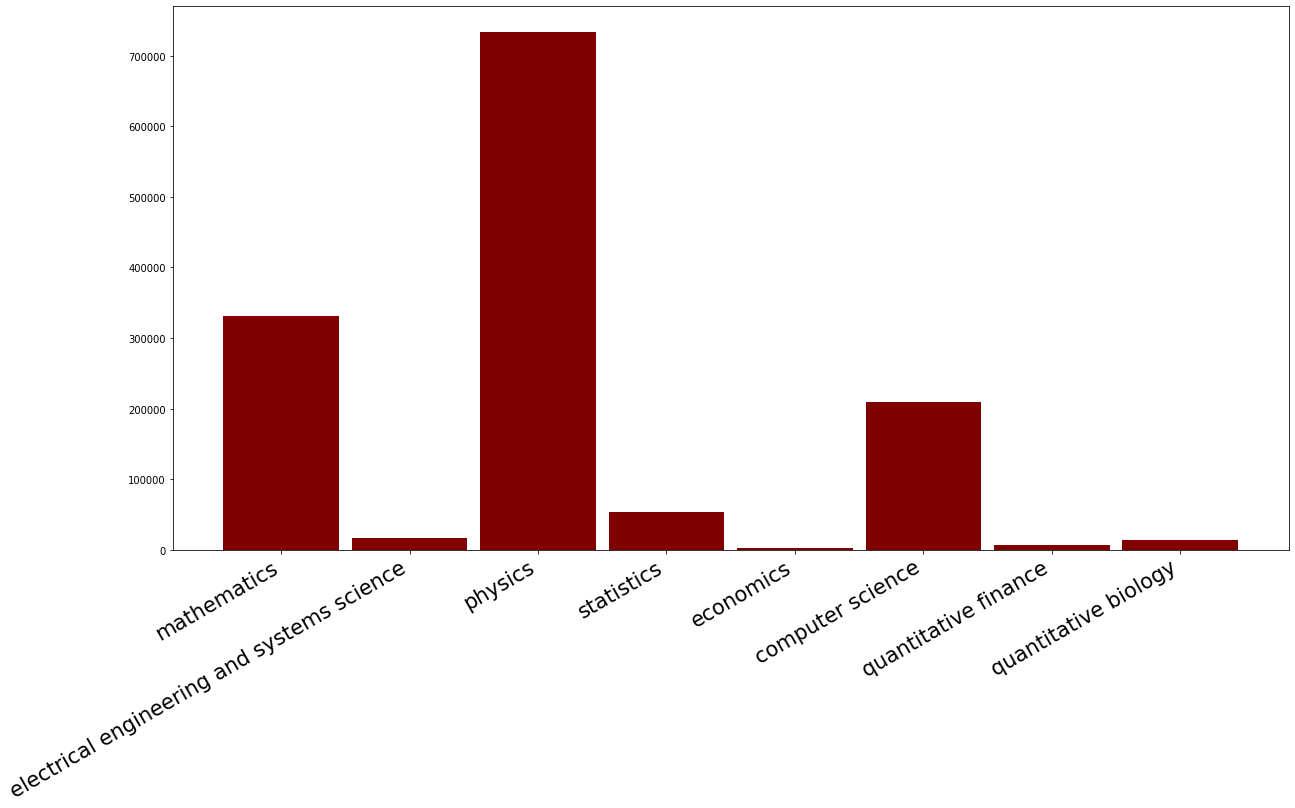

In [14]:
# Create bar plot with major categories

categories_labels = list(cat_counts.keys())
values = list(cat_counts.values())
  
fig = plt.figure(figsize = (20, 10))
ax = plt.gca()
 
# Creating the bar plot
plt.bar(categories_labels, values, color ='maroon',
        width = 0.9)

plt.xticks(rotation=30, ha='right')
ax.tick_params(axis='x', which='major', labelsize=21)

plt.show()

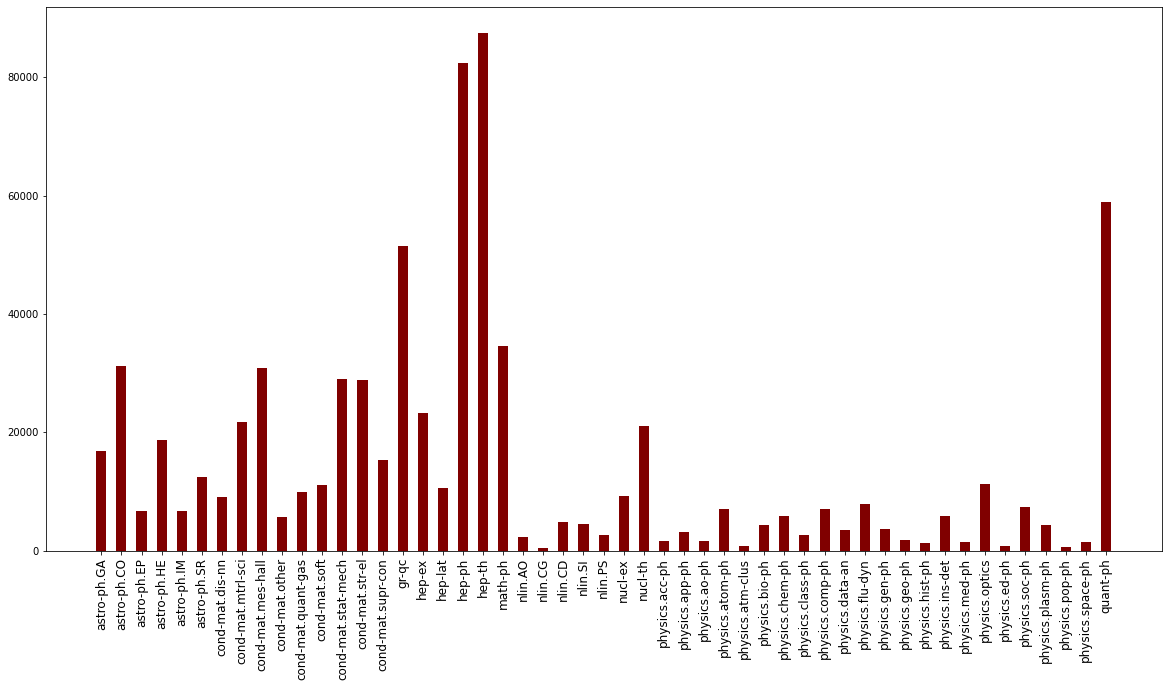

In [17]:
# Create bar plot with physics subcategories

physics_labels = list(sub_counts['physics'].keys())
values = list(sub_counts['physics'].values())
  
fig = plt.figure(figsize = (20, 10))
ax = plt.gca()
 
# Creating the bar plot
plt.bar(physics_labels, values, color ='maroon',
        width = 0.5)

plt.xticks(rotation=90)
ax.tick_params(axis='x', which='major', labelsize=12)

plt.show()